## Download de dependências

Este comando utiliza o gerenciador de pacotes `pip` para instalar um conjunto de bibliotecas Python essenciais para manipulação de dados, visualização, aprendizado de máquina e computação numérica. As bibliotecas instaladas são: `pandas` para estruturas de dados e ferramentas de análise de dados; `matplotlib` e `seaborn` para criação de gráficos estáticos, animados e interativos; `scikit-learn` para algoritmos de aprendizado de máquina; `tensorflow` para computação numérica e aprendizado de máquina em larga escala; e `plotly` para visualizações interativas.

In [1]:
!pip install pandas matplotlib seaborn scikit-learn tensorflow plotly

Defaulting to user installation because normal site-packages is not writeable


## Importar bibliotecas Python

Este trecho de código importa uma série de bibliotecas e módulos Python fundamentais para tarefas de processamento de linguagem natural (PLN) e aprendizado de máquina. Inicialmente, são importadas bibliotecas de propósito geral como `re` para expressões regulares e `nltk` para PLN, juntamente com bibliotecas numéricas e de manipulação de dados como `numpy` e `pandas`. Para visualização de dados, são incluídos `seaborn`, `plotly.express` e `matplotlib.pyplot`. Uma função `dummy_npwarn_decorator_factory` é definida e utilizada para suprimir um aviso específico (`_no_nep50_warning`) do NumPy, garantindo uma execução mais limpa. Em seguida, o código importa `tensorflow` e componentes específicos do `tensorflow.keras` para construção e treinamento de modelos de aprendizado profundo, incluindo camadas como `Embedding`, `LSTM`, `Dense`, `Dropout`, `Bidirectional`, `Input`, e utilitários como `Tokenizer` para processamento de texto, `pad_sequences` para normalização de sequências, e `callbacks` como `ReduceLROnPlateau` e `EarlyStopping` para otimizar o treinamento. Da biblioteca `sklearn`, são importados `train_test_split` e `KFold` para divisão de dados e validação cruzada, além de métricas de avaliação como `classification_report` e `confusion_matrix`. Finalmente, recursos do `nltk.corpus` e `nltk.stem` como `stopwords` (para remoção de palavras comuns) e `WordNetLemmatizer` (para lematização de palavras) são importados para pré-processamento de texto.

In [2]:
import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Layer

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

2025-06-02 21:11:19.245611: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 21:11:19.276044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 21:11:19.786112: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 21:11:19.979607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748909480.102255    4646 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748909480.16

## Carregar recursos nltk

Este comando utiliza a biblioteca NLTK (Natural Language Toolkit) para baixar o recurso `wordnet`. O WordNet é um extenso banco de dados lexical da língua inglesa, agrupando palavras em conjuntos de sinônimos chamados synsets, e é frequentemente empregado em tarefas de processamento de linguagem natural, como lematização e análise semântica. A execução desta linha garante que os dados do WordNet estejam disponíveis localmente para uso por outras funções do NLTK.

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/diogo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Pré-processamento textual

Este trecho de código define um processo de limpeza e normalização de texto. Inicialmente, um conjunto de `stop_words` (palavras comuns como "the", "is", "in") em inglês é carregado e um objeto `lemmatizer` da classe `WordNetLemmatizer` é instanciado, o qual é usado para reduzir palavras à sua forma base ou lema. Em seguida, a função `clean_text` é definida para processar um texto de entrada: primeiro, ela converte todo o texto para minúsculas e remove quaisquer caracteres que não sejam letras ou espaços, utilizando expressões regulares. Depois, o texto é dividido em palavras individuais. Cada palavra é então lematizada usando o `lemmatizer` previamente inicializado. Finalmente, as palavras processadas são unidas novamente em uma única string, separadas por espaços.

In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]  
    return ' '.join(words)

## Carregar dataset

Este segmento de código utiliza a biblioteca `pandas` para carregar dados de dois arquivos CSV distintos em DataFrames. O primeiro comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')`, lê o arquivo `True.csv`, localizado no diretório especificado, e armazena seu conteúdo em um DataFrame chamado `true_df`. De forma análoga, o segundo comando, `pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')`, carrega os dados do arquivo `Fake.csv` para um DataFrame denominado `fake_df`. Presume-se que estes arquivos contenham, respectivamente, notícias verdadeiras e falsas.

In [5]:
true_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/True.csv')
fake_df = pd.read_csv('./kaggle/input/fake-and-real-news-dataset/Fake.csv')

## Adicionar nova coluna "label"

Este trecho de código adiciona uma nova coluna chamada `label` a dois DataFrames existentes, `true_df` e `fake_df`. Ao DataFrame `true_df`, é atribuído o valor inteiro `1` para todas as entradas nesta nova coluna `label`. De forma similar, ao DataFrame `fake_df`, é atribuído o valor inteiro `0` para todas as entradas na coluna `label`. Esta operação é tipicamente realizada para criar uma variável alvo em tarefas de classificação, distinguindo as amostras dos dois DataFrames (por exemplo, notícias verdadeiras e falsas).

In [6]:
true_df['label'] = 1
fake_df['label'] = 0

## Cominar DataFrames

Este trecho de código realiza a combinação e o embaralhamento de dois DataFrames, `true_df` e `fake_df`, utilizando a biblioteca `pandas`. Primeiramente, a função `pd.concat([true_df, fake_df])` une os dois DataFrames verticalmente, empilhando suas linhas para criar um único DataFrame consolidado. Subsequentemente, o método `.sample(frac=1, random_state=42)` é aplicado a este DataFrame combinado. O argumento `frac=1` especifica que todas as linhas do DataFrame devem ser selecionadas (ou seja, 100% da amostra), e `random_state=42` garante que a ordem do embaralhamento seja a mesma sempre que o código for executado, proporcionando reprodutibilidade. O DataFrame resultante, agora contendo os dados de ambos os DataFrames originais de forma aleatoriamente misturada, é atribuído à variável `df`.

In [7]:
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42)

## Aplicação de Pré-tratamento

Este trecho de código processa uma coluna de texto em um DataFrame `pandas` chamado `df` e armazena os resultados em uma nova coluna. Especificamente, ele cria uma nova coluna denominada `cleaned_text` no DataFrame `df`. Os valores para esta nova coluna são gerados aplicando a função `clean_text` (previamente definida) a cada entrada da coluna `text` existente no DataFrame. Essencialmente, para cada texto na coluna `text`, a função `clean_text` é executada e seu resultado é inserido na linha correspondente da nova coluna `cleaned_text`.

In [8]:
df['cleaned_text'] = df['text'].apply(clean_text)

## Distribuição das etiquestas ("label")

Este trecho de código analisa e visualiza a distribuição de uma coluna categórica chamada `label` dentro de um DataFrame `pandas` denominado `df`. Primeiramente, o comando `print("Distribuição de etiquetas:\n", df['label'].value_counts())` calcula e exibe a contagem de ocorrências de cada valor único presente na coluna `label`, fornecendo uma visão numérica da distribuição. Em seguida, utiliza a biblioteca `seaborn` para criar um gráfico de barras (`sns.countplot(x='label', data=df)`), que representa visualmente essas contagens. Um título descritivo, 'Distribuição de notícias reais (1) e notícias falsas (0)', é adicionado ao gráfico através de `plt.title()`. Finalmente, `plt.show()` renderiza e exibe o gráfico gerado, permitindo uma inspeção visual da proporção entre as categorias (presumivelmente, notícias reais e falsas) no conjunto de dados.

Distribuição de etiquetas:
 label
0    23481
1    21417
Name: count, dtype: int64


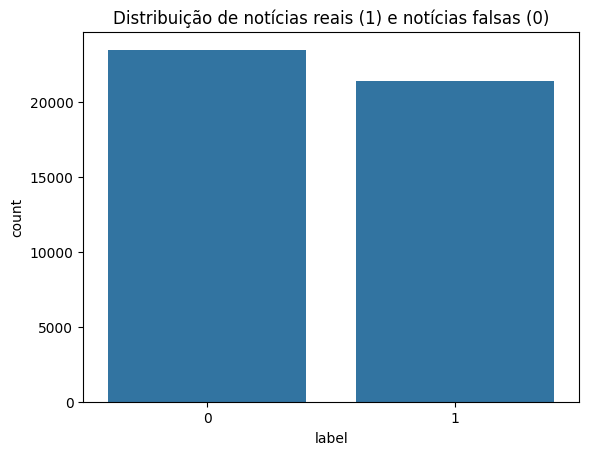

In [9]:
print("Distribuição de etiquetas:\n", df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title('Distribuição de notícias reais (1) e notícias falsas (0)')
plt.show()

## Tokenização de Preenchimento das Sequências

Este trecho de código prepara dados de texto para serem utilizados em um modelo de aprendizado de máquina, realizando a tokenização e o preenchimento (padding) das sequências. Inicialmente, são definidos dois parâmetros: `max_words`, que estabelece o tamanho máximo do vocabulário a ser considerado (as 10.000 palavras mais frequentes), e `max_len`, que determina o comprimento máximo para todas as sequências de texto (200 tokens). Em seguida, um objeto `Tokenizer` da biblioteca Keras é instanciado, configurado com `max_words`. Este `tokenizer` é treinado (`fit_on_texts`) utilizando os textos da coluna `cleaned_text` do DataFrame `df`, construindo assim um vocabulário interno. Após o treinamento, os textos da coluna `cleaned_text` são convertidos em sequências de inteiros (`texts_to_sequences`), onde cada palavra é substituída por seu índice correspondente no vocabulário. Essas sequências numéricas são então padronizadas para terem o mesmo comprimento (`max_len`) através da função `pad_sequences`, que trunca sequências mais longas ou preenche sequências mais curtas com zeros; o resultado é armazenado na variável `X`. Por fim, os valores da coluna `label` do DataFrame `df` são extraídos como um array NumPy e atribuídos à variável `y`, que normalmente representa as etiquetas ou alvos do modelo.

In [10]:
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

## Divisão do conjunto de dados

Este comando utiliza a função `train_test_split` da biblioteca `scikit-learn` para dividir os conjuntos de dados de características `X` e de rótulos `y` em subconjuntos de treinamento e teste. A divisão é configurada pelo parâmetro `test_size=0.4`, que especifica que 40% dos dados serão alocados para o conjunto de teste, enquanto os 60% restantes formarão o conjunto de treinamento. O argumento `random_state=42` é usado para garantir que a divisão seja feita da mesma maneira sempre que o código for executado, assegurando a reprodutibilidade dos resultados. Como resultado, são geradas quatro variáveis: `X_train` e `y_train` contendo as características e rótulos para treinamento do modelo, e `X_test` e `y_test` contendo as características e rótulos para avaliação do modelo.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construção do modelo

Este trecho de código define uma camada de autoatenção customizada e, em seguida, constrói e compila um modelo de rede neural sequencial utilizando essa camada, destinado a tarefas de classificação binária.

Inicialmente, é definida uma classe `SelfAttention` que herda de `tf.keras.layers.Layer`. O construtor `__init__` inicializa a camada com um número especificado de `units` e duas camadas densas (`W` e `V`) internas. O método `call` implementa a lógica da autoatenção: calcula um `score` aplicando as camadas `W` (com ativação tangente hiperbólica) e `V` às entradas; transforma esses scores em `attention_weights` através de uma função softmax; calcula um `context_vector` ponderando as entradas pelos pesos de atenção; e, por fim, soma o `context_vector` ao longo do eixo temporal para produzir uma representação agregada.

Em seguida, são definidos hiperparâmetros para o modelo: `max_words` (tamanho do vocabulário), `max_len` (comprimento da sequência) e `embedding_dim` (dimensionalidade da camada de embedding). O modelo é construído usando a API funcional do Keras: uma camada `Input` recebe sequências de `max_len`. Essas sequências passam por uma camada `Embedding`, seguida por uma camada `Bidirectional LSTM` (que retorna sequências para a camada de atenção). Após um `Dropout` para regularização, a camada `SelfAttention` customizada é aplicada. O resultado passa por uma camada `Dense` com ativação ReLU e regularização L2, outro `Dropout`, e finalmente uma camada `Dense` de saída com ativação sigmoide, adequada para classificação binária.

O `Model` é instanciado com as camadas de entrada e saída definidas. Ele é compilado (`model.compile`) utilizando o otimizador 'adam', a função de perda 'binary_crossentropy' (apropriada para classificação binária), e as métricas de 'accuracy' e AUC (Área Sob a Curva ROC). Por fim, `model.summary()` exibe um resumo da arquitetura do modelo, incluindo o número de parâmetros em cada camada.

In [12]:
class SelfAttention(Layer):
    def __init__(self, units):
        super(SelfAttention, self).__init__()
        self.units = units
        self.W = Dense(units)
        self.V = Dense(1)
    def call(self, inputs):
        score = self.V(K.tanh(self.W(inputs)))
        attention_weights = K.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = K.sum(context_vector, axis=1)
        return context_vector

max_words = 10000
max_len = 200
embedding_dim = 100

inputs = Input(shape=(max_len,))
x = Embedding(max_words, embedding_dim)(inputs)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dropout(0.5)(x)
x = SelfAttention(64)(x)
x = Dense(64, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
model.summary()

2025-06-02 21:13:21.020659: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 64)        │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ self_attention (SelfAttention)  │ (None, 64)             │         4,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,498 (3.98 MB)

 Trainable params: 1,042,498 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

## Treinamento do modelo

Este trecho de código configura e executa o processo de treinamento de um modelo Keras previamente definido (`model`). Inicialmente, são estabelecidos os parâmetros `batch_size` (tamanho do lote) como 32 e `epochs` (número de épocas) como 5. Em seguida, uma lista de `callbacks` é criada para monitorar e controlar o treinamento: `tf.keras.callbacks.EarlyStopping` é configurado para interromper o treinamento se não houver melhoria na métrica monitorada (por padrão, a perda de validação) por 2 épocas consecutivas (`patience=2`), restaurando os pesos do modelo correspondentes à melhor performance (`restore_best_weights=True`); e `tf.keras.callbacks.ReduceLROnPlateau` é configurado para reduzir a taxa de aprendizado pela metade (`factor=0.5`) se não houver melhoria por 1 época (`patience=1`). Finalmente, o método `model.fit()` é chamado para treinar o modelo, utilizando os dados de treinamento `X_train` e `y_train`. Durante o treinamento, 20% dos dados de treinamento (`validation_split=0.2`) são reservados para validação, o `batch_size` e `epochs` definidos são utilizados, e os `callbacks` configurados são aplicados. O histórico do processo de treinamento, contendo métricas como perda e acurácia por época, é armazenado na variável `history`.

In [13]:
batch_size = 32
epochs = 5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)
]
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.8763 - auc: 0.9381 - loss: 0.4540 - val_accuracy: 0.9848 - val_auc: 0.9974 - val_loss: 0.0707 - learning_rate: 0.0010
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 103ms/step - accuracy: 0.9876 - auc: 0.9981 - loss: 0.0552 - val_accuracy: 0.9857 - val_auc: 0.9984 - val_loss: 0.0521 - learning_rate: 0.0010
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 90s 100ms/step - accuracy: 0.9938 - auc: 0.9993 - loss: 0.0301 - val_accuracy: 0.9894 - val_auc: 0.9974 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.9968 - auc: 0.9998 - loss: 0.0185 - val_accuracy: 0.9914 - val_auc: 0.9979 - val_loss: 0.0398 - learning_rate: 0.0010
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9967 - auc: 0.9998 - loss: 0.0161 - val_accuracy: 0.9884 - val_auc: 0.9966 - val_loss: 0.0476 - learning_rate: 0.0010


## Visualização de resultados

Este trecho de código realiza a visualização do histórico de treinamento, a avaliação do desempenho do modelo treinado no conjunto de teste e a apresentação de métricas detalhadas. Primeiramente, são gerados dois gráficos de linha utilizando `plotly.express` para visualizar a evolução da perda (`loss` e `val_loss`) e da métrica AUC (`auc` e `val_auc`) ao longo das épocas de treinamento, com base nos dados armazenados em `history.history`. Em seguida, o modelo faz previsões no conjunto de teste `X_test`; essas previsões, que são probabilidades, são convertidas para classes binárias (0 ou 1) com um limiar de 0.5. Uma matriz de confusão é calculada usando `confusion_matrix` comparando os rótulos verdadeiros `y_test` com as previsões `y_pred`, e esta matriz é visualizada graficamente com `ConfusionMatrixDisplay` e `matplotlib.pyplot`, exibindo os resultados com o título 'Matriz de Confusão'. Posteriormente, um `classification_report` é impresso, fornecendo métricas como precisão, recall e F1-score para cada classe ('Fake', 'True'). Finalmente, o modelo é avaliado diretamente no conjunto de teste `X_test` e `y_test` através do método `model.evaluate()`, e a precisão e AUC resultantes dessa avaliação são impressas formatadas.

281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


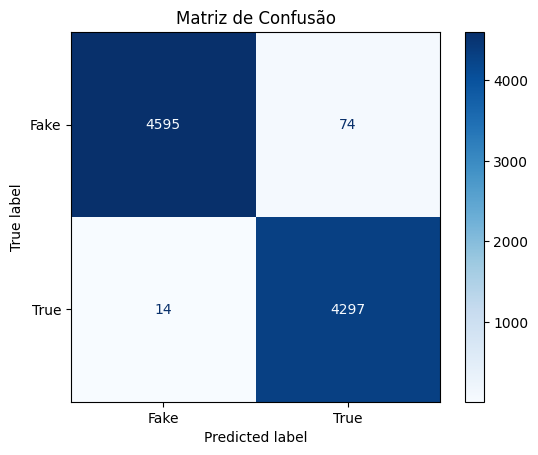

Relatório de Classificação:
               precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      4669
        True       0.98      1.00      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9890 - auc: 0.9977 - loss: 0.0460
Precisão no conjunto de teste: 0.9902
AUC no conjunto de teste: 0.9980


In [14]:
fig = px.line(history.history, y=['loss', 'val_loss'], labels={'x': "Epoch", 'y': "Loss"}, title="Loss Over Time")
fig.show()
fig = px.line(history.history, y=['auc', 'val_auc'], labels={'x': "Epoch", 'y': "AUC"}, title="AUC Over Time")
fig.show()

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=['Fake', 'True']))

test_results = model.evaluate(X_test, y_test)
print(f"Precisão no conjunto de teste: {test_results[1]:.4f}")
print(f"AUC no conjunto de teste: {test_results[2]:.4f}")

## Validação cruzada K-Fold

Este trecho de código implementa um processo de validação cruzada k-fold para treinar e avaliar um modelo de rede neural para classificação binária. Inicialmente, são definidos parâmetros como o número de folds (`k=5`), épocas de treinamento (`epochs=5`), tamanho do lote (`batch_size=32`), tamanho do vocabulário (`vocab_size=10000`), dimensão da camada de embedding (`embedding_dim=100`) e comprimento máximo da sequência (`max_len=200`). Um objeto `KFold` é configurado para dividir os dados de treinamento em `k` partes, com embaralhamento e um estado aleatório para reprodutibilidade.

O código então itera através de cada um dos `k` folds. Em cada iteração (fold), os dados de treinamento (`X_train`, `y_train`) são divididos em conjuntos de treinamento (`X_train_cv`, `y_train_cv`) e validação (`X_val_cv`, `y_val_cv`) específicos para aquele fold. Um novo modelo sequencial do Keras é definido em cada fold, consistindo em uma camada `Embedding`, uma camada `Bidirectional LSTM`, uma camada `Dropout`, uma camada `GlobalAveragePooling1D` (para agregar as características da sequência), uma camada `Dense` com ativação ReLU, outra camada `Dropout`, e finalmente uma camada `Dense` de saída com ativação sigmoide.

Este modelo é compilado utilizando o otimizador 'adam', a função de perda 'binary_crossentropy' e a métrica de 'accuracy'. Em seguida, o modelo é treinado com os dados de treinamento do fold atual (`X_train_cv`, `y_train_cv`), utilizando os dados de validação do fold (`X_val_cv`, `y_val_cv`) para monitorar o desempenho. Após o treinamento, são feitas previsões no conjunto de validação do fold, convertidas para rótulos binários, e um relatório de classificação (`classification_report`) é impresso, exibindo métricas como precisão e recall para aquele fold específico. O contador de `fold` é incrementado ao final de cada iteração.

In [15]:
k = 5
epochs = 5
batch_size = 32
vocab_size = 10000
embedding_dim = 100
max_len = 200

kfold = KFold(n_splits=k, shuffle=True, random_state=42)
fold_results_lstm = []

fold = 1
print("Iniciando Validação Cruzada para o modelo LSTM...")
for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f"\n📘 Fold {fold}")

    X_train_cv, X_val_cv = X_train[train_idx], X_train[val_idx]
    y_train_cv, y_val_cv = y_train[train_idx], y_train[val_idx]

    text_input_cv = tf.keras.Input(shape=(max_len,), name=f'text_input_fold_{fold}')
    text_emb_cv = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, name=f'embedding_fold_{fold}')(text_input_cv)
    lstm_out_cv = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, name=f'lstm_fold_{fold}')
    )(text_emb_cv)
    dropout_cv_1 = tf.keras.layers.Dropout(0.3, name=f'dropout1_fold_{fold}')(lstm_out_cv)
    pooled_cv = tf.keras.layers.GlobalAveragePooling1D(name=f'global_avg_pool_fold_{fold}')(dropout_cv_1)
    dense_cv = tf.keras.layers.Dense(64, activation='relu', name=f'dense_fold_{fold}')(pooled_cv)
    dropout_cv_2 = tf.keras.layers.Dropout(0.3, name=f'dropout2_fold_{fold}')(dense_cv)
    output_cv = tf.keras.layers.Dense(1, activation='sigmoid', name=f'output_fold_{fold}')(dropout_cv_2)

    model_cv_lstm = tf.keras.Model(inputs=text_input_cv, outputs=output_cv, name=f'LSTM_Fold_{fold}')

    model_cv_lstm.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    print(f"Treinando Fold {fold}...")
    history_cv_lstm = model_cv_lstm.fit(X_train_cv, y_train_cv,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(X_val_cv, y_val_cv),
                                        verbose=1)

    print(f"\nAvaliando Fold {fold} no conjunto de validação do fold:")
    results_val_fold = model_cv_lstm.evaluate(X_val_cv, y_val_cv, verbose=0)
    print(f"Fold {fold} - Val Loss: {results_val_fold[0]:.4f}, Val Accuracy: {results_val_fold[1]:.4f}, Val AUC: {results_val_fold[2]:.4f}")

    y_pred_cv = (model_cv_lstm.predict(X_val_cv) > 0.5).astype("int32")
    print(f"\nRelatório de Classificação para o Fold {fold} (no conjunto de validação do fold):\n")
    print(classification_report(y_val_cv, y_pred_cv, target_names=['Fake', 'True']))

    fold_results_lstm.append({
        'fold': fold,
        'val_loss': results_val_fold[0],
        'val_accuracy': results_val_fold[1],
        'val_auc': results_val_fold[2],
        'classification_report': classification_report(y_val_cv, y_pred_cv, target_names=['Fake', 'True'], output_dict=True)
    })

    fold += 1

print("\n--- Resultados da Validação Cruzada K-Fold para LSTM (média) ---")
avg_val_loss = np.mean([res['val_loss'] for res in fold_results_lstm])
avg_val_accuracy = np.mean([res['val_accuracy'] for res in fold_results_lstm])
avg_val_auc = np.mean([res['val_auc'] for res in fold_results_lstm])

print(f"Média Val Loss: {avg_val_loss:.4f}")
print(f"Média Val Accuracy: {avg_val_accuracy:.4f}")
print(f"Média Val AUC: {avg_val_auc:.4f}")

Iniciando Validação Cruzada para o modelo LSTM...

📘 Fold 1
Treinando Fold 1...
Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 100ms/step - accuracy: 0.8827 - auc: 0.9456 - loss: 0.2544 - val_accuracy: 0.9726 - val_auc: 0.9958 - val_loss: 0.0836
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 90s 101ms/step - accuracy: 0.9875 - auc: 0.9983 - loss: 0.0401 - val_accuracy: 0.9820 - val_auc: 0.9967 - val_loss: 0.0582
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 90s 100ms/step - accuracy: 0.9928 - auc: 0.9988 - loss: 0.0244 - val_accuracy: 0.9816 - val_auc: 0.9953 - val_loss: 0.0649
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 94s 104ms/step - accuracy: 0.9968 - auc: 0.9998 - loss: 0.0104 - val_accuracy: 0.9832 - val_auc: 0.9945 - val_loss: 0.0679
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 91s 101ms/step - accuracy: 0.9978 - auc: 0.9999 - loss: 0.0072 - val_accuracy: 0.9843 - val_auc: 0.9963 - val_loss: 0.0558

Avaliando Fold 1 no conjunto de validação do fold:
Fold 1 - Val Loss: 0.0558, Val Accuracy: 0.9843, Val AUC: 